<a href="https://colab.research.google.com/github/isaiasgj0002/ejerciciosIA/blob/main/ProyectoTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
from tensorflow.keras import optimizers

In [2]:
tf.compat.v1.logging.set_verbosity(
    tf.compat.v1.logging.ERROR
)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [3]:
dataset = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv",sep=',')
dataset = dataset.reindex(np.random.permutation(dataset.index))

In [4]:
dataset["median_house_value"]/=1000.0
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11064,-121.0,37.7,18.0,4197.0,1006.0,2203.0,874.0,2.2,118.6
2175,-117.4,33.2,19.0,928.0,317.0,845.0,319.0,1.6,187.5
12629,-121.7,38.5,18.0,974.0,317.0,521.0,317.0,1.1,137.5
13707,-122.0,38.2,7.0,11768.0,1893.0,6657.0,1874.0,4.9,142.9
6823,-118.3,34.0,36.0,1723.0,569.0,1664.0,501.0,1.9,161.1
...,...,...,...,...,...,...,...,...,...
12320,-121.5,38.3,36.0,1212.0,255.0,569.0,256.0,2.0,72.9
13714,-122.0,38.0,27.0,2491.0,428.0,1171.0,431.0,5.1,202.8
12002,-121.4,38.5,19.0,1808.0,375.0,758.0,320.0,2.0,92.0
5985,-118.2,33.9,39.0,1565.0,364.0,1389.0,360.0,2.7,113.9


In [5]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [6]:
caracteristica = dataset[["total_rooms"]]
columnas = [tf.feature_column.numeric_column("total_rooms")]
targets = dataset["median_house_value"]
optimizador = optimizers.SGD(lr=0.0000001, clipnorm=5.0)
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=columnas,
    optimizer=optimizador
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
  features = {key:np.array(value) for key,value in dict(features).items()}
  ds = Dataset.from_tensor_slices((features, targets))
  ds=ds.batch(batch_size).repeat(num_epochs)
  if shuffle:
    ds = ds.shuffle(buffer_size=10000)
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels

In [8]:
_=linear_regressor.train(input_fn=lambda:my_input_fn(caracteristica,targets),steps=100)

In [9]:
prediccion_input_fn = lambda:my_input_fn(caracteristica,targets,num_epochs=1,shuffle=False)
predicciones = linear_regressor.predict(input_fn=prediccion_input_fn)
predicciones = np.array([item['predictions'][0] for item in predicciones])

In [10]:
from numpy.lib import roots
mean_squared_error = metrics.mean_squared_error(predicciones, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Error cuatrdratico medio(en datos de entrenamiento):%0.3f" % mean_squared_error)
print("Raiz error cuadratico medio(en datos de entrenamiento):%0.3f" % root_mean_squared_error)

Error cuatrdratico medio(en datos de entrenamiento):56367.004
Raiz error cuadratico medio(en datos de entrenamiento):237.417


In [11]:
min_house_value = dataset["median_house_value"].min()
max_house_value = dataset["median_house_value"].max()
diferencia = max_house_value - min_house_value
print("valor minimo: ",min_house_value)
print("valor maximo: ",max_house_value)
print("Diferencia entre minimo y maximo: ",diferencia)
print("Raiz error cuadratico medio:%0.3f" % root_mean_squared_error)

valor minimo:  14.999
valor maximo:  500.001
Diferencia entre minimo y maximo:  485.00199999999995
Raiz error cuadratico medio:237.417


In [12]:
calibration_data=pd.DataFrame()
calibration_data["predictions"]=pd.Series(predicciones)
calibration_data["targets"]=pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0


In [13]:
ejemplo = dataset.sample(n=300)

In [14]:
x_0 = ejemplo["total_rooms"].min()
x_1 = ejemplo["total_rooms"].max()

In [15]:
weight = linear_regressor.get_variable_value("linear/linear_model/total_rooms/weights")[0]
bias = linear_regressor.get_variable_value("linear/linear_model/bias_weights")

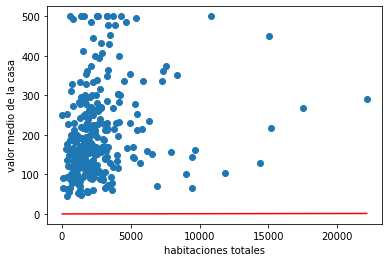

In [16]:
y_0 = weight * x_0 + bias
y_1 = weight * x_1 + bias
plt.plot([x_0,x_1],[y_0,y_1],c='r')
plt.ylabel("valor medio de la casa")
plt.xlabel("habitaciones totales")
plt.scatter(ejemplo["total_rooms"],ejemplo["median_house_value"])
plt.show()

In [26]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  periods = 10
  steps_per_period = steps / periods
  my_feature = input_feature
  my_feature_data = dataset[[my_feature]]
  my_label = "median_house_value"
  targets = dataset[my_label]
  feature_columns = [tf.feature_column.numeric_column (my_feature)]
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  optimizador = lambda:tf.keras.optimizers.SGD(lr=learning_rate, clipnorm=5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=columnas,
      optimizer=optimizador
  )
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title("linea aprendida por periodo")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  plt.scatter(ejemplo[my_feature],ejemplo[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1,1,periods)]
  print("Entrenamiento del modelo...")
  print("RMSE (en datos de entrenamiento):")
  root_mean_squared_errors=[]
  for period in range (0, periods):
    linear_regressor.train(
      input_fn=training_input_fn,
      steps=steps_per_period
    )
    predictions=linear_regressor.predict(input_fn=prediction_input_fn)
    predictions= np.array([item['predictions'][0] for item in predictions])
    root_mean_squared_error = math.sqrt(metrics.mean_squared_error(predictions, targets))
    print(" período %02d: %0.2f" % (period, root_mean_squared_error))
    root_mean_squared_errors.append(root_mean_squared_error)
    y_extents = np.array([0, ejemplo[my_label].max()])
    weight = linear_regressor.get_variable_value("linear/linear_model/total_rooms/weights")[0]
    bias = linear_regressor.get_variable_value("linear/linear_model/bias_weights")
    x_extents =(y_extents-bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,ejemplo[my_feature].max()),ejemplo[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period])
  print("Entrenamiento del Modelo finalizado.")
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periodos')
  plt.title("Raiz Error Cuadratico Medio vs. Períodos") 
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)
  calibration_data = pd.DataFrame()
  calibration_data["predictions"]=pd.Series(predictions) 
  calibration_data["targets"] = pd.Series (targets) 
  display.display (calibration_data.describe())
  print("RMSE final (en datos de entrenamiento): %0.2f" % root_mean_squared_error) 

Entrenamiento del modelo...
RMSE (en datos de entrenamiento):
 período 00: 225.62
 período 01: 214.41
 período 02: 204.03
 período 03: 194.96
 período 04: 187.21
 período 05: 179.98
 período 06: 174.98
 período 07: 171.05
 período 08: 168.70
 período 09: 167.35
Entrenamiento del Modelo finalizado.


,predictions,targets
count,17000.0,17000.0
mean,116.4,207.3
std,95.9,116.0
min,0.1,15.0
25%,64.4,119.4
50%,93.6,180.4
75%,138.7,265.0
max,1669.3,500.0


RMSE final (en datos de entrenamiento): 167.35


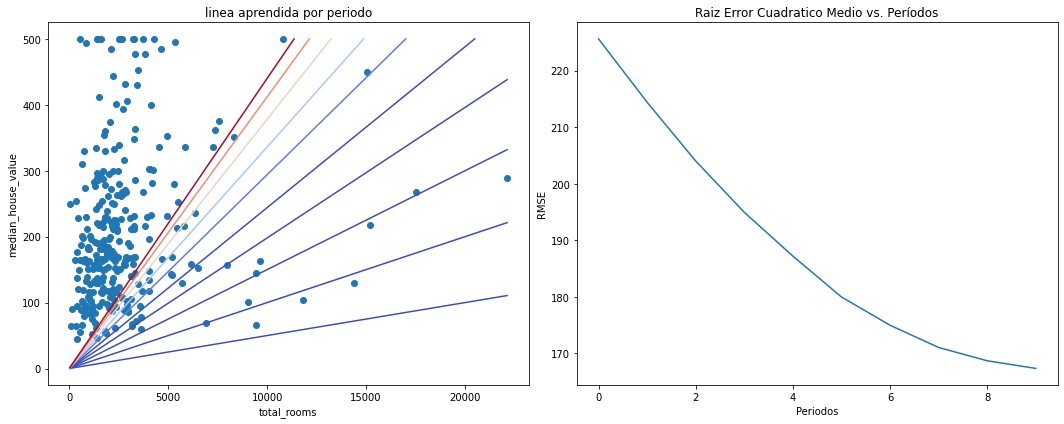

In [27]:
train_model(
    learning_rate=0.00002,
    steps=500,
    batch_size=5
)